# Demo of Ch4. Convolutional Neural Network
----
This is the sample code of TU-ETP-AD1062 Machine Learning Fundamentals.

For more information, please refer to:
https://sites.google.com/view/tu-ad1062-mlfundamentals/

## Import packages
----
- `keras`:
    - `dataset`: For loading MNIST, Fashion MNIST, and IMDB movie review dataset
    - `models.*`, `layers.*`, and `optimizers.*`: For loading related components layers to constructing convolutional neural network 
    - `utils.to_categorical`: For converting numerical labels into categorical labels

In [1]:
from keras.datasets import mnist, fashion_mnist, imdb

from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Embedding, Conv1D, Conv2D, MaxPooling2D, GlobalMaxPooling1D, Flatten, Dense, Dropout, Activation
from keras.optimizers import Adadelta
from keras.utils import to_categorical

import numpy as np
from sklearn.metrics import zero_one_loss

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from mlfund.plot import PlotMetric

%matplotlib inline

Using TensorFlow backend.


## Load Dataset
----
The **MNIST** database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

For more information, see: http://yann.lecun.com/exdb/mnist/

The **Fashion MNIST** is a dataset of Zalando's article images - consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms.

For more information, see: https://github.com/zalandoresearch/fashion-mnist

> **Tips:** You can directly change `mnist.load_data()` to `fashion_mnist.load_data()`

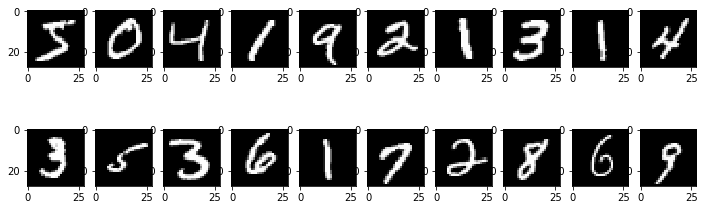

In [2]:
# Load and reshape data
(X_fmnist_train, y_fmnist_train), (X_fmnist_test, y_fmnist_test) = mnist.load_data()

X_fmnist_train = X_fmnist_train.reshape(X_fmnist_train.shape[0], 28, 28, 1)
X_fmnist_test = X_fmnist_test.reshape(X_fmnist_test.shape[0], 28, 28, 1)

n_classes_fmnist = len(np.unique(np.concatenate((y_fmnist_train, y_fmnist_test))))

y_fmnist_train_categorical = to_categorical(y_fmnist_train)
y_fmnist_test_categorical = to_categorical(y_fmnist_test)

# Plot data
plt.figure(figsize=(12, 4))
for i in range(0, 20):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_fmnist_train[i,:,:,0], cmap='gray')

This IMDB movie reviews dataset contains movie reviews along with their associated binary sentiment polarity labels. It is intended to serve as a benchmark for sentiment classification.

For more information, see: https://www.kaggle.com/iarunava/imdb-movie-reviews-dataset

In [3]:
max_num_words_in_dict = 5000

(X_imdb_train, y_imdb_train), (X_imdb_test, y_imdb_test) = imdb.load_data(num_words=max_num_words_in_dict)

## 4.2. Convolutional Neural Network

### Demo 4.2.1 Image Classification
----
The demo here shows how to construct the simplest Convolutional Neural Network model for MNIST Classification.

In [4]:
def create_convNet(num_classes):
    model = Sequential()
    
    model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])
    
    return model

In [5]:
num_classes = len(np.unique(y_fmnist_train))

model = create_convNet(n_classes_fmnist)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 392)               0         
__________

In [6]:
model.fit(X_fmnist_train, y_fmnist_train_categorical, batch_size=256, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 9s 158us/step - loss: 2.9822 - acc: 0.6700
Epoch 2/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.3523 - acc: 0.8923
Epoch 3/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.2248 - acc: 0.9290
Epoch 4/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.1826 - acc: 0.9431
Epoch 5/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.1551 - acc: 0.9501
Epoch 6/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.1459 - acc: 0.9533
Epoch 7/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.1378 - acc: 0.9567
Epoch 8/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.1288 - acc: 0.9602
Epoch 9/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.1291 - acc: 0.9587
Epoch 10/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.1233 - 

0.01970000000000005

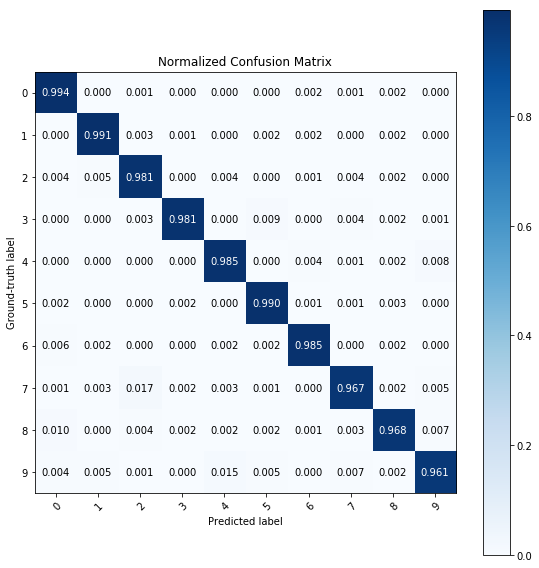

In [7]:
# Predict test data
y_fmnist_test_categorical_predict = model.predict(X_fmnist_test)
y_fmnist_test_predict = np.argmax(y_fmnist_test_categorical_predict, axis=1)

# Compute the zero-one-loss
err_loss = zero_one_loss(y_fmnist_test, y_fmnist_test_predict)
display(err_loss)

# Plot the confusion matrix
plot = PlotMetric(figsize=(8, 8))
plot.title('Confusion matrix')
plot.set_labels(['%s' % i for i in range(0,10)])
plot.confusion_matrix(y_fmnist_test, y_fmnist_test_predict)

### Demo 4.2.2 Model Observation

#### Demo 4.2.2.1 Hidden Parameters of Convolution Layer
----
The demo here shows the visualized result of the learned parameters in the first convolutional layer.

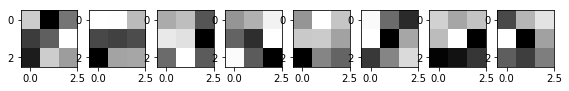

In [8]:
N_filters = model.layers[0].get_weights()[0].shape[-1]
dim_filter = model.layers[0].get_weights()[0].shape[0:2]

plt.figure(figsize=(12, 4))
for i in range(0, N_filters):
    plt.subplot(int(np.ceil(N_filters/10)), 10, i+1)
    plt.imshow(model.layers[0].get_weights()[0][:, :, 0, i], cmap='gray')
    

#### Demo 4.2.2.2 Convolution result of the 1st Convolution Layer `conv2d_1`
----
The demo here shows the convolution result of the features with the paramter learend in `conv2d_1`

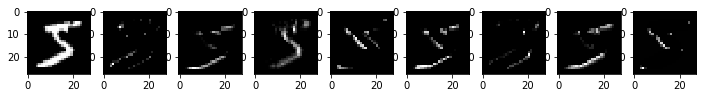

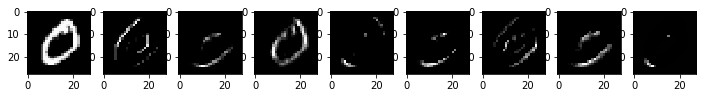

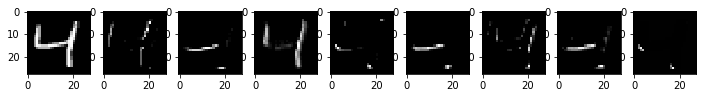

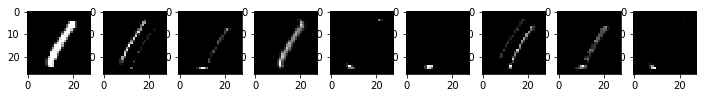

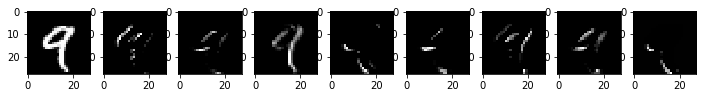

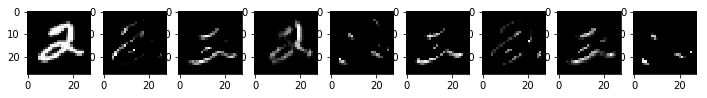

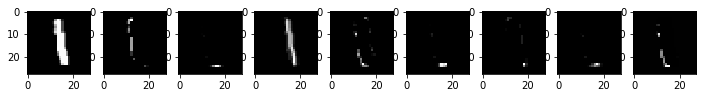

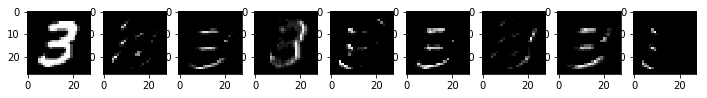

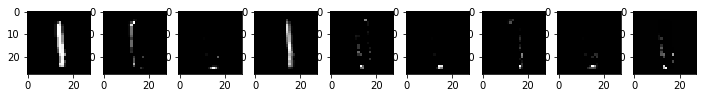

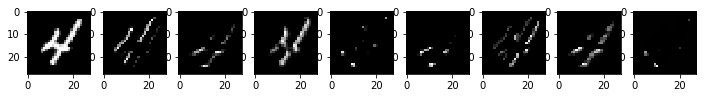

In [9]:
model_int1 = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)

output_shape_conv1 = (28, 28)
output_channels = 8
N_show = 10

X_intermediate = model_int1.predict( X_fmnist_train[0:N_show, :, :, :] )
for i in range(0, len(X_intermediate)):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, output_channels+1, 1)
    plt.imshow(X_fmnist_train[i, :, :, 0].reshape( (28, 28) ), cmap='gray')
    
    for c in range(0, output_channels):
        xic_intermediate = X_intermediate[i,:,:,c]
        plt.subplot(1, output_channels+1, c+2)
        plt.imshow(xic_intermediate.reshape( output_shape_conv1 ), cmap='gray')


#### Demo 4.2.2.3 Convolution result of the 2nd Convolution Layer `conv2d_2`
----
The demo here shows the convolution result of the features with the paramter learend in `conv2d_2`

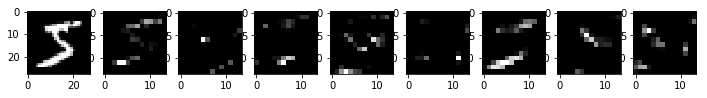

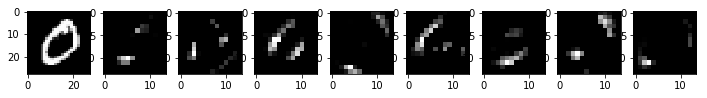

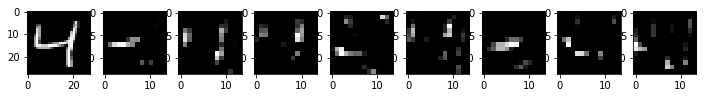

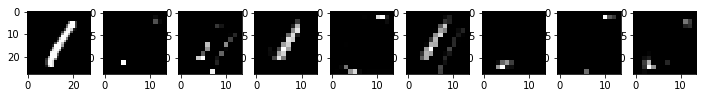

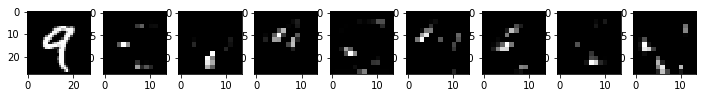

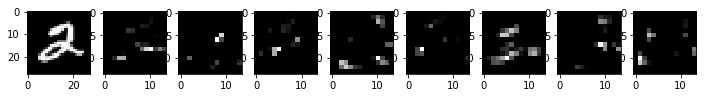

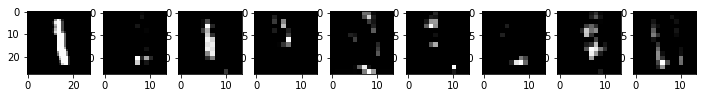

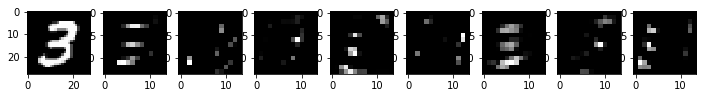

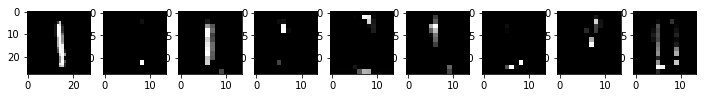

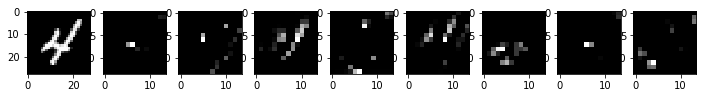

In [10]:
model_int2 = Model(inputs=model.input, outputs=model.get_layer('conv2d_2').output)

output_shape_conv1 = (14, 14)
output_channels = 8
N_show = 10

X_intermediate = model_int2.predict( X_fmnist_train[0:N_show, :, :, :] )
for i in range(0, len(X_intermediate)):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, output_channels+1, 1)
    plt.imshow(X_fmnist_train[i, :, :, 0].reshape( (28, 28) ), cmap='gray')
    
    for c in range(0, output_channels):
        xic_intermediate = X_intermediate[i,:,:,c]
        plt.subplot(1, output_channels+1, c+2)
        plt.imshow(xic_intermediate.reshape( output_shape_conv1 ), cmap='gray')


## 4.3. Applications

### Demo 4.3.1 Sentence Classification using Convolutional Neural Network

#### Demo 4.3.1.1 Text Pre-processing
----
The pre-processing here pads each sequences to the length of `max_num_words_in_sentence`

In [11]:
max_num_words_in_sentence = 400
embedding_dims = 50

X_imdb_train = sequence.pad_sequences(X_imdb_train, maxlen=max_num_words_in_sentence)
X_imdb_test = sequence.pad_sequences(X_imdb_test, maxlen=max_num_words_in_sentence)

#### Demo 4.3.1.2 Construct the Network
----
The demo here construct a neural network for training and predicting the sentences.

In [12]:
def create_NLP_convNet():
    model = Sequential()

    model.add(Embedding(max_num_words_in_dict, embedding_dims, input_length=max_num_words_in_sentence))
    model.add(Dropout(0.2))
    
    model.add(Conv1D(250, 3, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPooling1D())

    model.add(Dense(250))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [13]:
model_nlp = create_NLP_convNet()
model_nlp.summary()
model_nlp.fit(X_imdb_train, y_imdb_train, batch_size=256, epochs=2, validation_data=(X_imdb_test, y_imdb_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 400, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_4 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0         
__________